**<h2>Projeto Análise Quant Bitcoin</h2>**

**Nesse projeto vamos criar uma média movel simples de 30 dias com o preço do bitcoin em 2023 e também realizar uma predição sobre o preço do Bitcoin para o próximo dia.**

**Passos:**

*   Realizar um filtro dos dados para capturar apenas os dados de 2023;
*   Utilizar as colunas necessários como time e PriceUSD para criar a média movel;
*   Criar a média movel com uma janela de 30 dias;
*   Criar o gráfico da média móvel;
*   Realizar os filtros necessários para realizar a regressão;
*   Utilizar a biblioteca sklearn.linear_model import LinearRegression para realizar a predição;
*  Criando um gráfico da regressão e o preço com predição para o próximo dia.



In [ ]:
import pandas as pd

bitcoin = pd.read_csv("/content/raw.githubusercontent.com_coinmetrics_data_master_csv_btc.csv")

<ipython-input-20-61d33b63185e>:3: DtypeWarning: Columns (146) have mixed types. Specify dtype option on import or set low_memory=False.
  bitcoin = pd.read_csv("/content/raw.githubusercontent.com_coinmetrics_data_master_csv_btc.csv")


In [ ]:
bitcoin['time'] = pd.to_datetime(bitcoin['time'])
bitcoin[["time"]]

,time
0,2009-01-03
1,2009-01-04
2,2009-01-05
3,2009-01-06
4,2009-01-07
...,...
5341,2023-08-19
5342,2023-08-20
5343,2023-08-21
5344,2023-08-22


In [ ]:
bitcoin_2023 = bitcoin.loc[bitcoin["time"]>='2023-01-01']


In [ ]:
bitcoin_price_2023 = bitcoin_2023[["time", "PriceUSD"]].copy()
bitcoin_price_2023

,time,PriceUSD
5111,2023-01-01,16606.752043
5112,2023-01-02,16688.719273
5113,2023-01-03,16670.077384
5114,2023-01-04,16848.366039
5115,2023-01-05,16824.800183
...,...,...
5341,2023-08-19,26093.981808
5342,2023-08-20,26176.472164
5343,2023-08-21,26128.905016
5344,2023-08-22,25978.209691


In [ ]:
# verificando os valores nulos
bitcoin_price_2023.isna().sum()


time        0
PriceUSD    1
dtype: int64

In [ ]:
bitcoin_price_2023.dropna()

,time,PriceUSD
5111,2023-01-01,16606.752043
5112,2023-01-02,16688.719273
5113,2023-01-03,16670.077384
5114,2023-01-04,16848.366039
5115,2023-01-05,16824.800183
...,...,...
5340,2023-08-18,26037.365847
5341,2023-08-19,26093.981808
5342,2023-08-20,26176.472164
5343,2023-08-21,26128.905016


In [ ]:
bitcoin_price_2023.set_index("time", inplace=True)

In [ ]:
print(bitcoin_price_2023.columns)

Index(['PriceUSD', 'MME30'], dtype='object')


In [ ]:
bitcoin_price_2023['MME30'] = bitcoin_price_2023['PriceUSD'].rolling(window = 30).mean()
bitcoin_price_2023.head(50)


,PriceUSD,MME30
time,,
2023-01-01,16606.752043,NaN
2023-01-02,16688.719273,NaN
2023-01-03,16670.077384,NaN
2023-01-04,16848.366039,NaN
2023-01-05,16824.800183,NaN
2023-01-06,16957.862274,NaN
2023-01-07,16942.628589,NaN
2023-01-08,17059.239944,NaN
2023-01-09,17182.319852,NaN


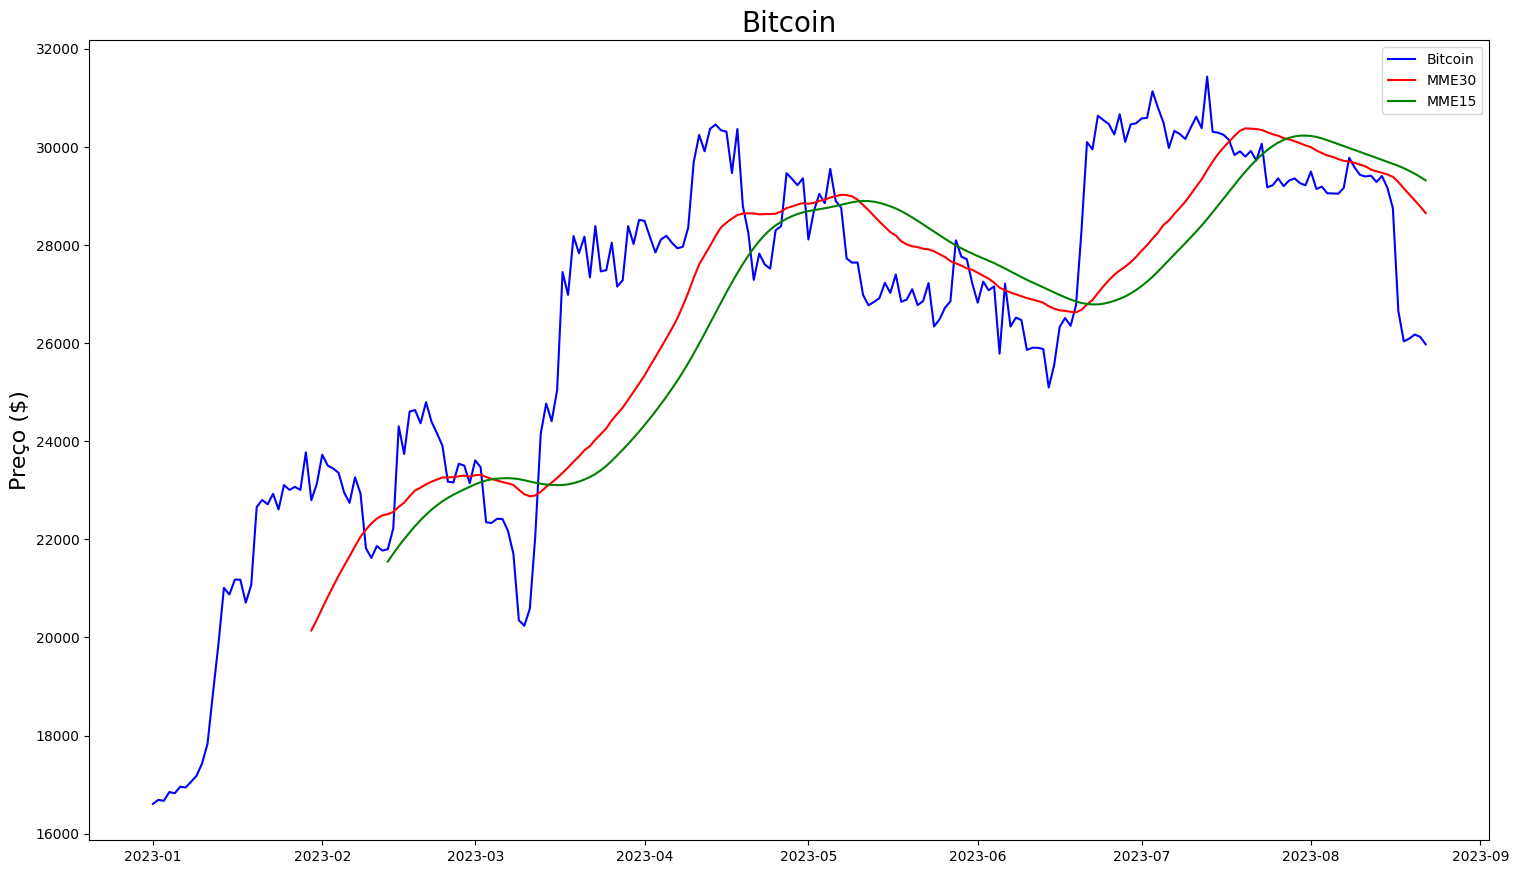

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (14, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(bitcoin_price_2023['PriceUSD'], color="blue", label = 'Bitcoin')
ax.plot(bitcoin_price_2023['MME30'], color="red", label = 'MME30')
ax.plot(bitcoin_price_2023['MME30'].rolling(window = 15).mean(), color="green",label = 'MME15')
ax.set_title('Bitcoin', fontsize = 20)
ax.set_ylabel('Preço ($)', fontsize = 16)

plt.legend()

**<h2> Utilizando regressão linear para predizer o preço do dia seguinte</h2>**

**A regressão linear busca encontrar uma relação linear entre a média móvel (variável independente) e o preço do Bitcoin (variável dependente). Ao ajustar essa linha aos dados históricos, ela pode ser usada para prever os preços futuros com base na média móvel.**

In [ ]:
# Realizando um seleção para pegar apenas os dados a partir da média móvel de 30 dias
bitcoin_predict = bitcoin_price_2023.loc[(bitcoin_price_2023["PriceUSD"]>= 22799.427262)&(bitcoin_price_2023["MME30"]>= 20143.526236)]
bitcoin_predict

,PriceUSD,MME30
time,,
2023-01-31,23130.051913,20360.969565
2023-02-01,23727.202608,20595.585676
2023-02-02,23505.604843,20823.436591
2023-02-03,23445.813177,21043.351496
2023-02-04,23355.524386,21261.042303
...,...,...
2023-08-18,26037.365847,29157.366602
2023-08-19,26093.981808,29033.645777
2023-08-20,26176.472164,28908.871732


**Veficando se ambas colunas tem o mesma dimensão**


In [ ]:
bitcoin_predict[["PriceUSD"]].shape

(187, 1)

In [ ]:
bitcoin_predict[["MME30"]].shape

(187, 1)

**Realizando a regressão**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Preparar os dados para treinamento

X = bitcoin_predict["MME30"].values.reshape(-1, 1)
Y = bitcoin_predict['PriceUSD'].values.reshape(-1,1)  # Valores futuros para predição

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X,Y)

# Fazer predições para o próximo dia
previsões_proximo_dia = bitcoin_predict['MME30'].iloc[-1:].values.reshape(-1, 1)
predicao = model.predict(previsões_proximo_dia)

print("Preço previsto para o próximo dia:", np.round(predicao,2))

Preço previsto para o próximo dia: [[28718.16]]


**Plotando um gráfico**

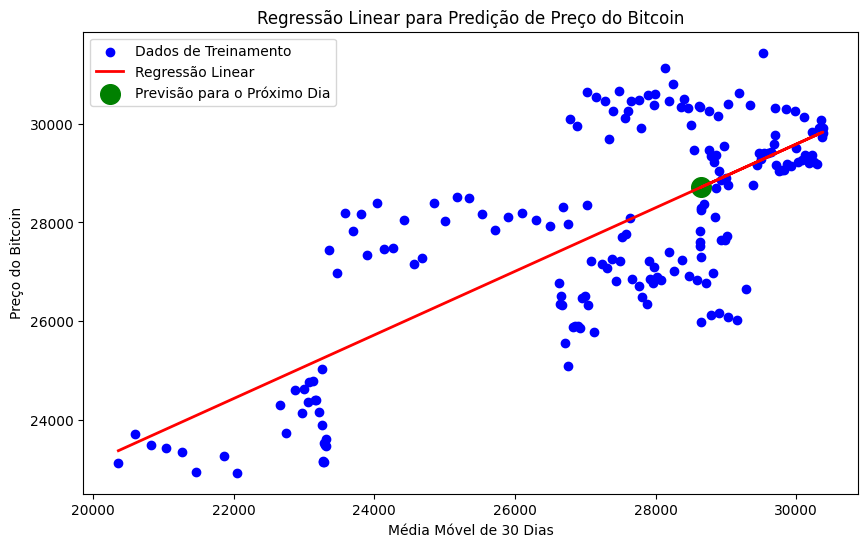

In [ ]:
import matplotlib.pyplot as plt

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Dados de Treinamento')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regressão Linear')
plt.scatter(previsões_proximo_dia, predicao, color='green', s=200, label='Previsão para o Próximo Dia')
plt.xlabel('Média Móvel de 30 Dias')
plt.ylabel('Preço do Bitcoin')
plt.title('Regressão Linear para Predição de Preço do Bitcoin')
plt.legend()
plt.show()
